# Automated Anomaly Detection
**Objective**: Understand and practice automated anomaly detection using various techniques.

**Task**: Anomaly Detection with Isolation Forest

**Steps**:
1. Data Set: Obtain a dataset of server response times.
2. Train Model: Use Isolation Forest to train a model on the response time data.
3. Detect Anomalies: Predict which response times are anomalies.
4. Evaluate Results: Assess the number of anomalies detected.

Number of Anomalies Detected: 30
Number of Normal Points: 270


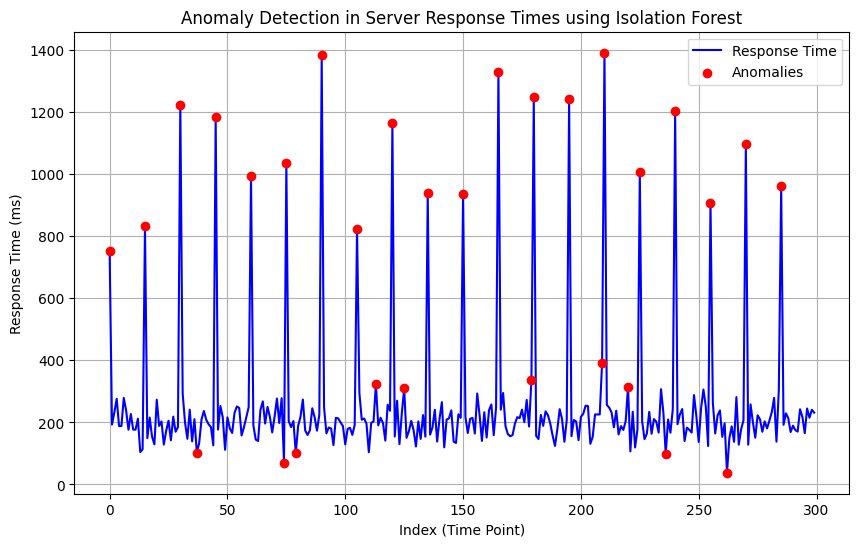

In [1]:
# write your code from here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Generate Synthetic Server Response Time Data (You can replace this with your real dataset)
np.random.seed(42)
response_times = np.random.normal(loc=200, scale=50, size=300)  # Normal response times (200ms mean, 50ms std)

# Introducing anomalies (e.g., server lag or spikes)
response_times[::15] = np.random.normal(loc=1000, scale=300, size=20)  # Anomalous response times (1000ms)

# Create DataFrame
df = pd.DataFrame({'Response_Time': response_times})

# Step 2: Train the Isolation Forest Model
model = IsolationForest(contamination=0.1, random_state=42)  # Assume 10% of the data is anomalous
model.fit(df[['Response_Time']])

# Step 3: Detect Anomalies
# Predict anomalies: -1 = anomaly, 1 = normal
predictions = model.predict(df[['Response_Time']])

# Add the anomaly prediction to the DataFrame
df['Anomaly'] = np.where(predictions == -1, 'Anomaly', 'Normal')

# Step 4: Evaluate the Results
# Count the number of anomalies detected
anomalies_count = df['Anomaly'].value_counts()

# Print the number of anomalies detected
print(f"Number of Anomalies Detected: {anomalies_count['Anomaly']}")
print(f"Number of Normal Points: {anomalies_count['Normal']}")

# Step 5: Visualize the Results
plt.figure(figsize=(10, 6))
plt.plot(df['Response_Time'], label='Response Time', color='blue')

# Highlight anomalies
anomalies = df[df['Anomaly'] == 'Anomaly']
plt.scatter(anomalies.index, anomalies['Response_Time'], color='red', label='Anomalies', zorder=5)

plt.title("Anomaly Detection in Server Response Times using Isolation Forest")
plt.xlabel("Index (Time Point)")
plt.ylabel("Response Time (ms)")
plt.legend()
plt.grid(True)
plt.show()